In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime as dt

from tools_fast import *
from hc_graph import *
sns.set()

<IPython.core.display.Javascript object>

Open console to check js libs were loaded in page


In [3]:
fund_name = 'MACPX'
pd.read_csv(r"financial_data/hfrx_index_names.csv", index_col=0)

,Full Name
Name,
HFRXAR,HFRX Absolute Return Index
HFRXDS,HFRX ED: Distressed Restructuring Index
HFRXMA,HFRX ED: Merger Arbitrage Index
HFRXSS,HFRX ED: Special Situations Index
HFRXEMN,HFRX EH: Equity Market Neutral Index
HFRXEHG,HFRX EH: Fundamental Growth Index
HFRXEHV,HFRX EH: Fundamental Value Index
HFRXEMC,HFRX Emerging Markets Composite Index
HFRXEW,HFRX Equal Weighted Strategies Index


### Financial data loads and cleaning

In [4]:
# US rate
US_rate = pd.read_csv(r"financial_data/USD_rates.csv", index_col=0, parse_dates=True, dayfirst=True)['3M']

# HFRX
hfrx_all = pd.read_csv(r"financial_data/hfrx_daily_index_data.csv", index_col=0, parse_dates=True, dayfirst=True)
hfrx = make_ER(hfrx_all[[fund_name]].dropna(), US_rate)

# BNP

bnp = pd.read_csv(r"financial_data/bnp_data_long_term.csv", index_col=0, parse_dates=True, dayfirst=True) #[["BNPIFEU","BNPIFUS",
                 #"BNPIFJP","BNPIFCN","BNPIFFR","BNPIFGE","BNPIFGB","BNPIFCH","BNPIFKR","BNPIFUSC","BNPIFBR",
                 #"BNPIFAU","BNPIFHK","BNPIFTW","BNPIFSG","BNPIFIT","BNPIFSP","BNPIFSW","BNPIFNE","BNPIFRU","BNPIFEM"]]

risk_premia = pd.read_pickle("financial_data/risk_premia_ER_FX_USD.pkl").ffill() #[["BNPICCE3","BNPIVMRU","BNPIAIRT","BNPIAIRU",
                  #"BNPIEC03","BNPIPLEE","BNPIPMEE","BNPIPQEE","BNPIPVEE","BNPILUEE","BNPIPMUH","BNPIPQUH",
                  #"BNPIPVUH","BNPIAIRG","BNPIAIRJ","BNPIAIRE"]]

In [5]:
df_info = pd.read_csv(r"financial_data/bnp_info.csv", index_col=0)
df_info.head()

,Asset Class,Style
Ticker,,
BNPIDRXA,Commodity,Carry
BNPIF3AX,Commodity,Carry
BNPIF3XM,Commodity,Momentum
BPFXSTGU,FX,Value
BNPICCE3,Equity,Carry


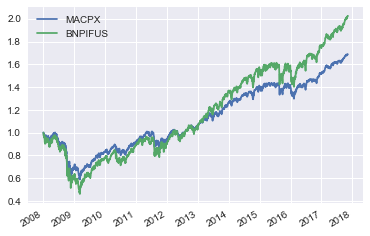

In [63]:
(prices_all.loc['2008':] / prices_all.loc['2008':].iloc[0])[[fund_name, 'BNPIFUS']].plot()

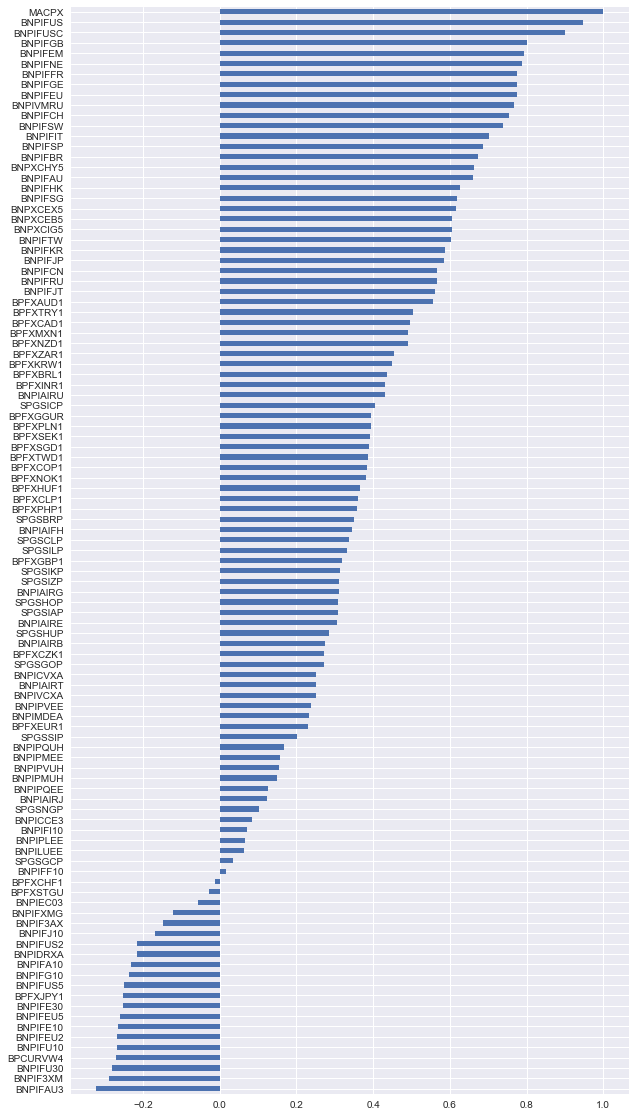

In [58]:
prices_all = hfrx.join(bnp,how="left").join(risk_premia,how="left").ffill()
prices_all.resample('7D').first().pct_change().corr()[[fund_name]].sort_values(by=fund_name).plot(kind='barh', legend=None, figsize=(10,20))

In [7]:
prices_all.head()

,MACPX,BNPIFEU,BNPIFUS,BNPIFJP,BNPIFCN,BNPIFFR,BNPIFGE,BNPIFGB,BNPIFCH,BNPIFKR,...,BNPIPMEE,BNPIPQEE,BNPIPVEE,BNPILUEE,BNPIPMUH,BNPIPQUH,BNPIPVUH,BNPIMDEA,BNPIAIFH,BNPICVXA
2003-03-31,1.000000,119.746431,137.960807,55.002147,22.904581,97.681949,75.088460,85.874648,131.164048,105.5605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-01,1.006404,121.270258,139.983719,55.886297,22.952384,98.292425,75.692747,87.678180,132.780174,105.7853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-02,1.020167,127.035774,143.698758,56.353244,23.040957,102.304380,79.676099,89.466028,137.079115,107.0412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-03,1.017372,128.539724,142.655403,55.808539,22.909725,103.959571,80.267351,89.862012,138.848431,108.1501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-04,1.018184,130.361973,143.316375,56.487221,22.997248,105.782754,81.131912,90.727931,141.003673,110.5014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
%%time
from clustering import cluster, cluster_net
C = prices_all.pct_change().corr(method='pearson')
names = np.array(list(C.columns))
n = len(names)
indices = np.arange(n, dtype=np.int32)
c_net = cluster_net(indices, C.values)
c_net.successive_merge(n-1, only_likelihood_improve=True)
i = 1
for cluster in c_net.clusters:
    print("Cluster",i,": \n", "Average correlation of {:.0%}".format(cluster.average_correl), "\n",
          df_info.loc[names[cluster.names]], "\n \n")
    i = i + 1

Total number of merges: 75
Cluster 1 : 
 Average correlation of 100% 
          Asset Class           Style
Ticker                              
BNPILUEE      Equity  Low Volatility 
 

Cluster 2 : 
 Average correlation of 99% 
          Asset Class       Style
Ticker                          
BNPIVCXA   Commodity  Volatility
BNPICVXA   Commodity  Volatility 
 

Cluster 3 : 
 Average correlation of 96% 
         Asset Class    Style
Ticker                      
BNPIFJP      Equity  Classic
BNPIFJT      Equity  Classic 
 

Cluster 4 : 
 Average correlation of 91% 
          Asset Class    Style
Ticker                       
BNPIFUSC      Equity  Classic
MACPX            NaN      NaN
BNPIFUS       Equity  Classic 
 

Cluster 5 : 
 Average correlation of 89% 
          Asset Class    Style
Ticker                       
BNPIFA10       Bonds  Classic
BNPIFAU3       Bonds  Classic 
 

Cluster 6 : 
 Average correlation of 89% 
         Asset Class    Style
Ticker                      
SPGSHUP

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  # This is added back by InteractiveShellApp.init_path()


In [9]:
returns_all = prices_all.pct_change().iloc[1:]
hrfx_returns = returns_all[[fund_name]]
returns_all = returns_all.drop(fund_name, axis=1)
prices_all = prices_all.drop(fund_name, axis=1).bfill()

In [10]:
alpha = hrfx_returns[fund_name].autocorr(lag=1)
hrfx_returns_adj = ((hrfx_returns - alpha * hrfx_returns.shift(1)) / (1. - alpha)).fillna(0) # 'liquidity adjustment' for
                                                                                             # removing returns autocorrelation
beta = hrfx_returns_adj[fund_name].autocorr(lag=1)

Auto-correlation of MACPX returns : -0.06253533429824881
Auto-correlation of MACPX adjusted returns : -0.004072994378829193


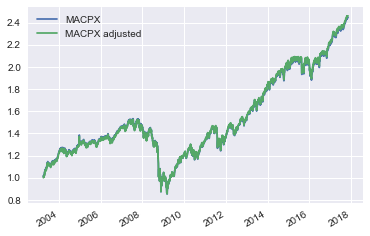

In [11]:
print("Auto-correlation of",fund_name,"returns :", alpha)
print("Auto-correlation of",fund_name,"adjusted returns :", beta)
ax = (1 + hrfx_returns).cumprod().plot()
_ = (1 + hrfx_returns_adj).cumprod()[fund_name].plot(label=fund_name + ' adjusted', legend=True, ax=ax)

## Estimation of the exposures

In [12]:
size = 126
freq = 5
tau = 0.1
freq_ml = 20

In [13]:
%%time
df_weight_ols = ridge_regression(hrfx_returns, returns_all,sample_length=size, frequency=freq, l=1e-10)
prices_for_track_ols = prices_all.loc[df_weight_ols.index[0]:]

Wall time: 52.7 s


In [14]:
%time
df_weight_ridge = ridge_regression(hrfx_returns, returns_all,sample_length=size, frequency=freq, l=1e-2)

prices_for_track_ridge = prices_all.loc[df_weight_ridge.index[0]:]

Wall time: 0 ns


c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=2.675e-04, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=8.265e-05, with an active set of 68 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.266e-05, with an active set of 70 regress

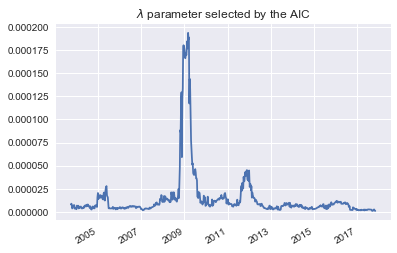

Wall time: 1min 8s


In [15]:
%%time
df_weight_aic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='aic')

prices_for_track_aic = prices_all.loc[df_weight_aic.index[0]:]

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=2.675e-04, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=8.265e-05, with an active set of 68 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.266e-05, with an active set of 70 regress

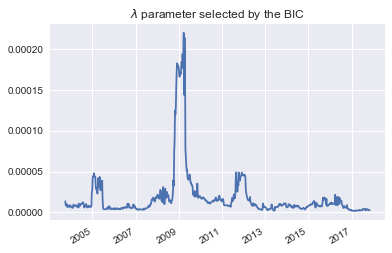

Wall time: 1min 4s


In [16]:
%%time
df_weight_bic, _ = lasso_regression_ic(hrfx_returns, returns_all,sample_length=size, frequency=freq, criterion='bic')

prices_for_track_bic = prices_all.loc[df_weight_bic.index[0]:]

In [17]:
%%time
nu = 0.5
df_weight_kalman = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu)

prices_for_track_kalman = prices_all.loc[df_weight_kalman.index[0]:]

Wall time: 627 ms


In [18]:
%%time
df_weight_ml_kalman, _ = ml_kalman_filter(hrfx_returns, returns_all, freq_ml, tau=tau)

Wall time: 19.2 s


In [19]:
%%time
df_weight_kalman_bic = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,
                                               nu=nu, criterion='bic')

prices_for_track_kalman_bic = prices_all.loc[df_weight_kalman_bic.index[0]:]

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=2.675e-04, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=8.265e-05, with an active set of 68 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.266e-05, with an active set of 70 regress

Wall time: 1min 4s


In [20]:
%%time
df_weight_ml_kalman_bic = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic')

prices_for_track_ml_kalman_bic = prices_all.loc[df_weight_ml_kalman_bic.index[0]:]

Wall time: 41.7 s


In [21]:
%%time
df_weight_kalman_aic = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,
                                               nu=nu, criterion='aic')

prices_for_track_kalman_aic = prices_all.loc[df_weight_kalman_aic.index[0]:]

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=2.675e-04, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=8.265e-05, with an active set of 68 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.266e-05, with an active set of 70 regress

Wall time: 1min 7s


In [22]:
%%time
df_weight_ml_kalman_aic = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic')

prices_for_track_ml_kalman_aic = prices_all.loc[df_weight_ml_kalman_aic.index[0]:]

Wall time: 46.8 s


## Replication

In [23]:
%%time
tc = 0.0005
lag = 2

replication_ols = make_track(prices_for_track_ols, df_weight_ols, tc=tc, lag=lag)
df_res = hfrx.loc[replication_ols.index]
df_res["OLS"] = replication_ols

replication_ridge = make_track(prices_for_track_ridge, df_weight_ridge, tc=tc, lag=lag)
df_res["Ridge"] = replication_ridge

replication_aic = make_track(prices_for_track_aic, df_weight_aic, tc=tc, lag=lag)
df_res["Lasso AIC"] = replication_aic

replication_aic = make_track(prices_for_track_aic, df_weight_aic, tc=tc, lag=lag)
df_res["Lasso AIC"] = replication_aic

replication_bic = make_track(prices_for_track_bic, df_weight_bic, tc=tc, lag=lag)
df_res["Lasso BIC"] = replication_bic

replication_kalman = make_track(prices_for_track_kalman, df_weight_kalman, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman"] = replication_kalman

replication_ml_kalman = make_track(prices_for_track_kalman, df_weight_ml_kalman, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman"] = replication_ml_kalman

replication_kalman_aic = make_track(prices_for_track_kalman_aic, df_weight_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman AIC"] = replication_kalman_aic

replication_ml_kalman_aic = make_track(prices_for_track_ml_kalman_aic, df_weight_ml_kalman_aic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman AIC"] = replication_ml_kalman_aic

replication_kalman_bic = make_track(prices_for_track_kalman_bic, df_weight_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["Kalman BIC"] = replication_kalman_bic

replication_ml_kalman_bic = make_track(prices_for_track_ml_kalman_bic, df_weight_ml_kalman_bic, tc=tc, lag=lag).loc[df_res.index[0]:]
df_res["ML Kalman BIC"] = replication_ml_kalman_bic

Wall time: 233 ms


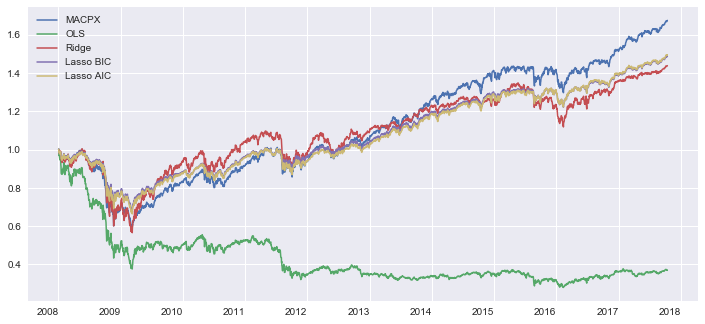

In [24]:
df_res = df_res.loc['2008':'2017-10-13']  #.loc['06-2009':]
df_res = (df_res / df_res.iloc[0])
df_res[[fund_name, 'OLS', 'Ridge', 'Lasso BIC', 'Lasso AIC']].plot(figsize=(12,6), rot=0, linewidth=1.5)

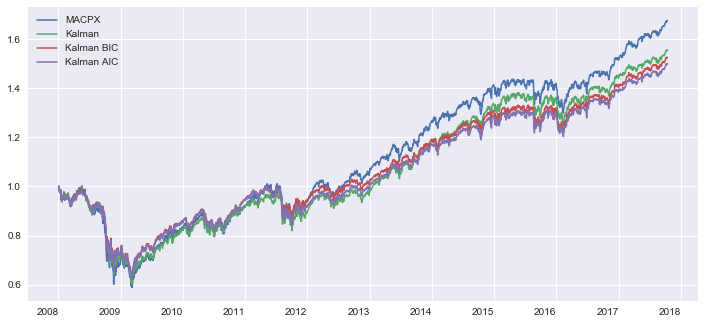

In [25]:
df_res[[fund_name, 'Kalman', 'Kalman BIC', 'Kalman AIC']].plot(figsize=(12,6), rot=0, linewidth=1.5)

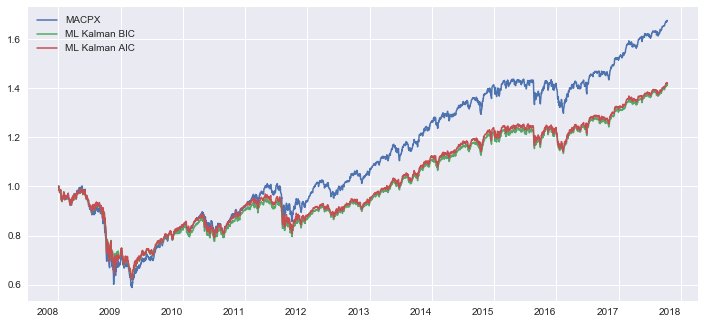

In [26]:
df_res[[fund_name, "ML Kalman BIC", "ML Kalman AIC"]].plot(figsize=(12,6), rot=0, linewidth=1.5)

In [27]:
df_stat = replication_stats(df_res, fund_name=fund_name)
df_stat

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
MACPX,1.000000,1.000000,0.000000,1.000000,0.514528,0.053815,-0.394882
OLS,0.847159,0.620386,0.121385,-0.110927,-0.396546,-0.095890,-0.718706
Ridge,0.912940,0.712377,0.062465,0.705807,0.326795,0.037594,-0.406291
Lasso AIC,0.966503,0.832829,0.033481,0.915483,0.477723,0.041808,-0.317992
Lasso BIC,0.966107,0.829901,0.036267,0.900829,0.493624,0.041279,-0.307684
Kalman,0.973151,0.835649,0.026510,0.947014,0.459559,0.045954,-0.378890
ML Kalman,0.957574,0.796402,0.033498,0.915395,0.362325,0.035479,-0.398290
Kalman AIC,0.967760,0.829177,0.029125,0.936041,0.434631,0.042076,-0.358193
ML Kalman AIC,0.969857,0.828684,0.028282,0.939692,0.386233,0.036421,-0.361114
Kalman BIC,0.968807,0.830425,0.028863,0.937189,0.455783,0.043917,-0.356468


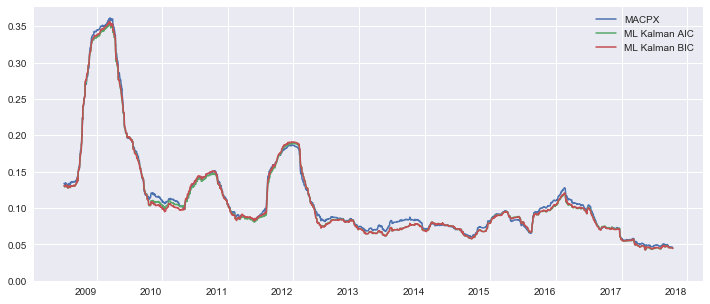

In [28]:
vol = np.sqrt(252) * df_res.pct_change().rolling(window=126).std().dropna()
vol[[fund_name, 'ML Kalman AIC', 'ML Kalman BIC']].plot(ylim=(0,None), figsize=(12,5.6), linewidth=1.5, rot=0)

### Volatility adjustment

In [29]:
%%time
vol_period = 20
df_weight_kalman_aic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_bic_voladj = selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq,\
                                          nu=nu, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_bic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='bic', vol_target=True, vol_period=vol_period)
df_weight_ml_kalman_aic_voladj = ml_selective_kalman_filter(hrfx_returns, returns_all,sample_length=size, frequency=freq_ml,
                                                     tau=tau, criterion='aic', vol_target=True, vol_period=vol_period)
df_weight_kalman_voladj = kalman_filter(hrfx_returns, returns_all,freq, sigma_weight=1. , sigma_return=nu,
                                        vol_target=True, vol_period=size)
df_weight_ml_kalman_voladj, _ = ml_kalman_filter(hrfx_returns, returns_all,freq, tau=tau, vol_target=True, vol_period=size)

prices_for_track = prices_all.loc[df_weight_kalman_voladj.index[0]:]

replication_kalman_voladj = make_track(prices_for_track, df_weight_kalman_voladj, tc=tc, lag=lag)
df_res_voladj = hfrx.loc[replication_kalman_voladj.index]
df_res_voladj["Kalman VT"] = replication_kalman_voladj

replication_ml_kalman_voladj = make_track(prices_for_track, df_weight_ml_kalman_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman VT"] = replication_ml_kalman_voladj

prices_for_track = prices_all.loc[df_weight_kalman_aic_voladj.index[0]:]

replication_kalman_aic_voladj = make_track(prices_for_track, df_weight_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman AIC VT"] = replication_kalman_aic_voladj

replication_ml_kalman_aic_voladj = make_track(prices_for_track, df_weight_ml_kalman_aic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman AIC VT"] = replication_ml_kalman_aic_voladj

replication_kalman_bic_voladj = make_track(prices_for_track, df_weight_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["Kalman BIC VT"] = replication_kalman_bic_voladj

replication_ml_kalman_bic_voladj = make_track(prices_for_track, df_weight_ml_kalman_bic_voladj, tc=tc, lag=lag)
df_res_voladj["ML Kalman BIC VT"] = replication_ml_kalman_bic_voladj

c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 78 iterations, i.e. alpha=2.675e-04, with an active set of 66 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 80 iterations, i.e. alpha=8.265e-05, with an active set of 68 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
c:\program files (x86)\python36-32\lib\site-packages\sklearn\linear_model\least_angle.py:313: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 82 iterations, i.e. alpha=2.266e-05, with an active set of 70 regress

Wall time: 3min 12s


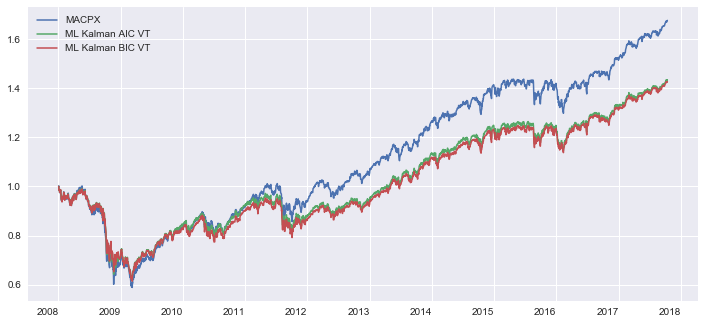

In [30]:
df_res_voladj = df_res_voladj.loc['2008':'2017-10-13'].dropna()
df_res_voladj = (df_res_voladj / df_res_voladj.iloc[0])
df_res_voladj[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5)

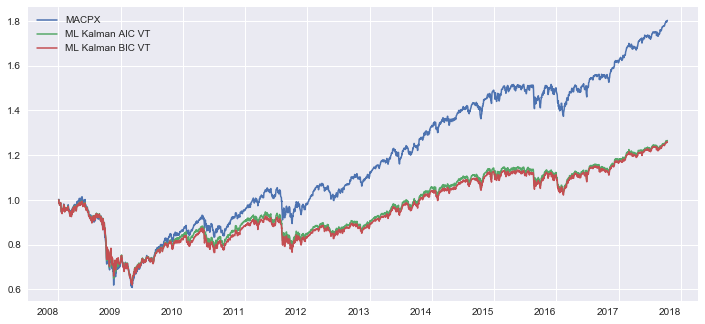

In [31]:
df_res_volperfadj = df_res_voladj[[fund_name]].copy()
temp = df_res_voladj.drop(fund_name, axis=1)
df_res_volperfadj[temp.columns]= make_ER(temp, 2 + 0 * US_rate)
df_res_volperfadj = make_ER(df_res_volperfadj, - US_rate)
df_res_volperfadj[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(figsize=(12,6), rot=0, linewidth=1.5)

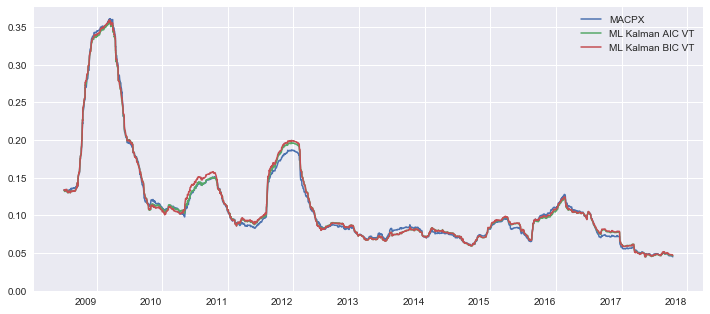

In [32]:
vol = np.sqrt(252) * df_res_voladj.pct_change().rolling(window=126).std().dropna()
vol[[fund_name, 'ML Kalman AIC VT', 'ML Kalman BIC VT']].plot(ylim=(0,None), figsize=(12,5.8), linewidth=1.5, rot=0)

## Statistics on replication

In [33]:
df_stat_vol = replication_stats(df_res_voladj, fund_name=fund_name)
df_stat_vol

,Correlation,Kendall tau,Tracking error,R-squared,Sharpe ratio,Annual Return,Maximum Drawdown
MACPX,1.000000,1.000000,0.000000,1.000000,0.514528,0.053815,-0.394882
Kalman VT,0.970997,0.835356,0.027705,0.942127,0.465751,0.047837,-0.383147
ML Kalman VT,0.952333,0.783197,0.035743,0.903673,0.289947,0.027182,-0.430864
Kalman AIC VT,0.967667,0.832151,0.029055,0.936350,0.447955,0.044273,-0.362250
ML Kalman AIC VT,0.969195,0.828437,0.028365,0.939339,0.386010,0.037360,-0.365771
Kalman BIC VT,0.967534,0.830471,0.029125,0.936042,0.463732,0.045955,-0.359651
ML Kalman BIC VT,0.966797,0.827975,0.029430,0.934695,0.382203,0.036818,-0.368190


## Volatility contributions

In [34]:
df_vol_contrib_kalman_bic_voladj = (prices_all.reindex(df_weight_ml_kalman_bic_voladj.index).pct_change()*df_weight_ml_kalman_bic_voladj).std()
df_vol_contrib_kalman_bic_voladj = df_vol_contrib_kalman_bic_voladj/df_vol_contrib_kalman_bic_voladj.sum()

df_vol_contrib_kalman_aic_voladj = (prices_all.reindex(df_weight_ml_kalman_aic_voladj.index).pct_change()*df_weight_ml_kalman_aic_voladj).std()
df_vol_contrib_kalman_aic_voladj = df_vol_contrib_kalman_aic_voladj/df_vol_contrib_kalman_aic_voladj.sum()

In [35]:
df_vol_contrib = pd.DataFrame()
df_vol_contrib["ML Kalman AIC VT"] = df_vol_contrib_kalman_aic_voladj
df_vol_contrib["ML Kalman BIC VT"] = df_vol_contrib_kalman_bic_voladj
df_vol_contrib = df_vol_contrib.join(df_info).reset_index()

In [36]:
df_vol_contrib_asset_class = df_vol_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
df_vol_contrib_style = df_vol_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [37]:
g = hc_spiderweb(df_vol_contrib_asset_class, title="Vol contribution by Asset Class")
g.plot()

In [38]:
g = hc_spiderweb(df_vol_contrib_style, title="Vol contribution by Style")
g.plot()

In [39]:
g = hc_piechart(df_vol_contrib_asset_class[["ML Kalman BIC VT"]], title="Vol contribution by Asset Class in ML Kalman BIC VT")
g.plot()

In [40]:
g = hc_piechart(df_vol_contrib_style[["ML Kalman BIC VT"]], title="Vol contribution by Style in Kalman BIC")
g.plot()

## Performance contributions

In [41]:
df_perf_contrib_kalman_bic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_bic_voladj.index).pct_change()*df_weight_ml_kalman_bic_voladj).prod() - 1

df_perf_contrib_kalman_aic_voladj = (1 + prices_all.reindex(df_weight_ml_kalman_aic_voladj.index).pct_change()*df_weight_ml_kalman_aic_voladj).prod() - 1

In [42]:
df_perf_contrib = pd.DataFrame()
df_perf_contrib["ML Kalman AIC VT"] = df_perf_contrib_kalman_aic_voladj
df_perf_contrib["ML Kalman BIC VT"] = df_perf_contrib_kalman_bic_voladj
df_perf_contrib = df_perf_contrib.join(df_info).reset_index()

In [43]:
df_perf_contrib_asset_class = df_perf_contrib.drop(["Style"],axis=1).groupby(["Asset Class","index"]).sum()
df_perf_contrib_style = df_perf_contrib.drop(["Asset Class"],axis=1).groupby(["Style","index"]).sum()

In [44]:
g = hc_spiderweb(df_perf_contrib_asset_class, title="Vol contribution by Asset Class")
g.plot()

In [45]:
g = hc_spiderweb(df_perf_contrib_style, title="Vol contribution by Style")
g.plot()

## Average exposures

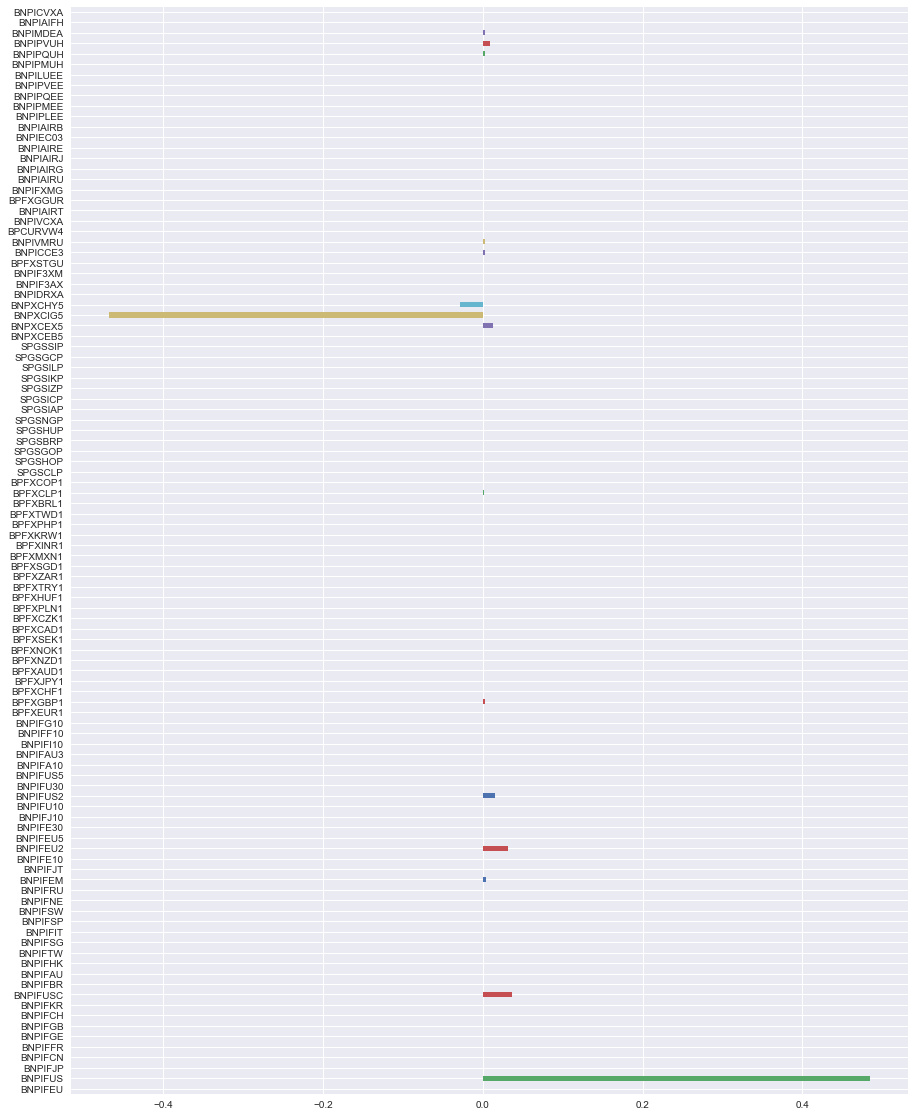

In [46]:
(df_weight_aic).mean(axis=0).plot(kind='barh', figsize=(15,20))

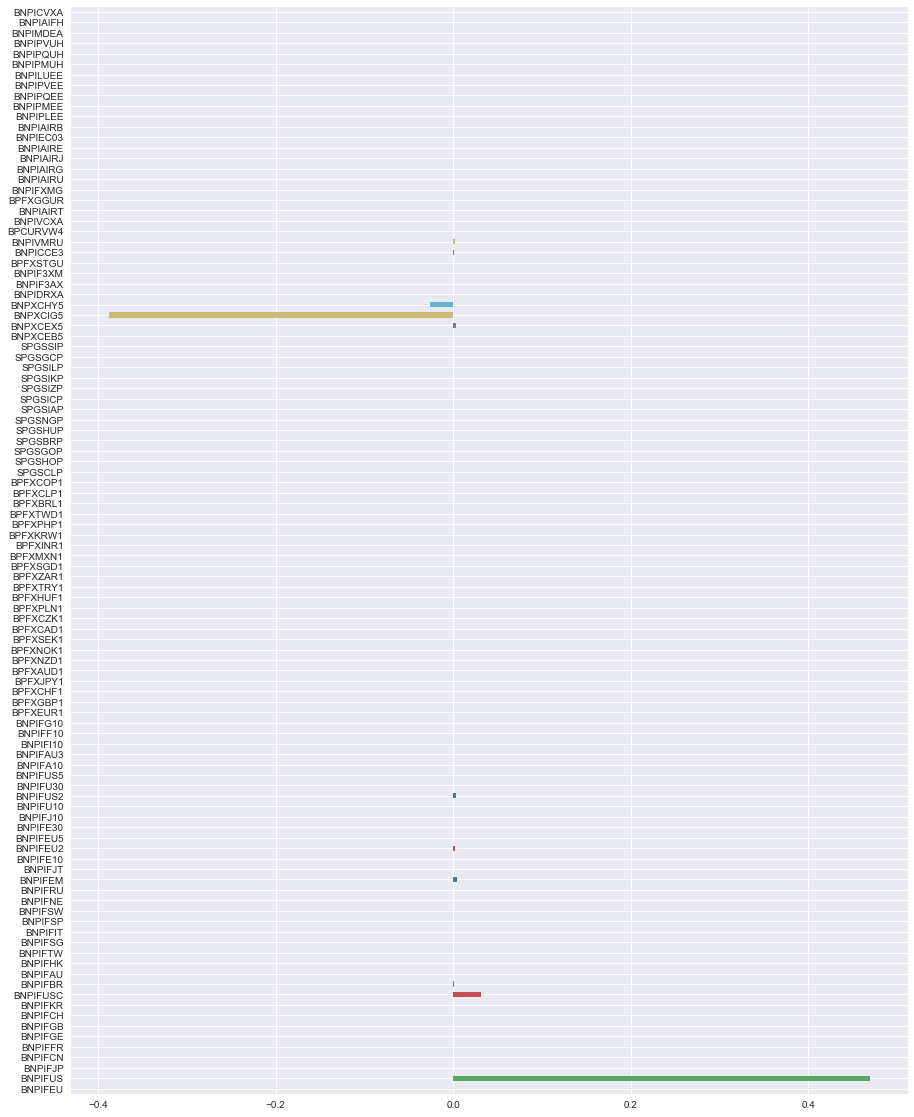

In [47]:
(df_weight_bic).mean(axis=0).plot(kind='barh', figsize=(15,20))

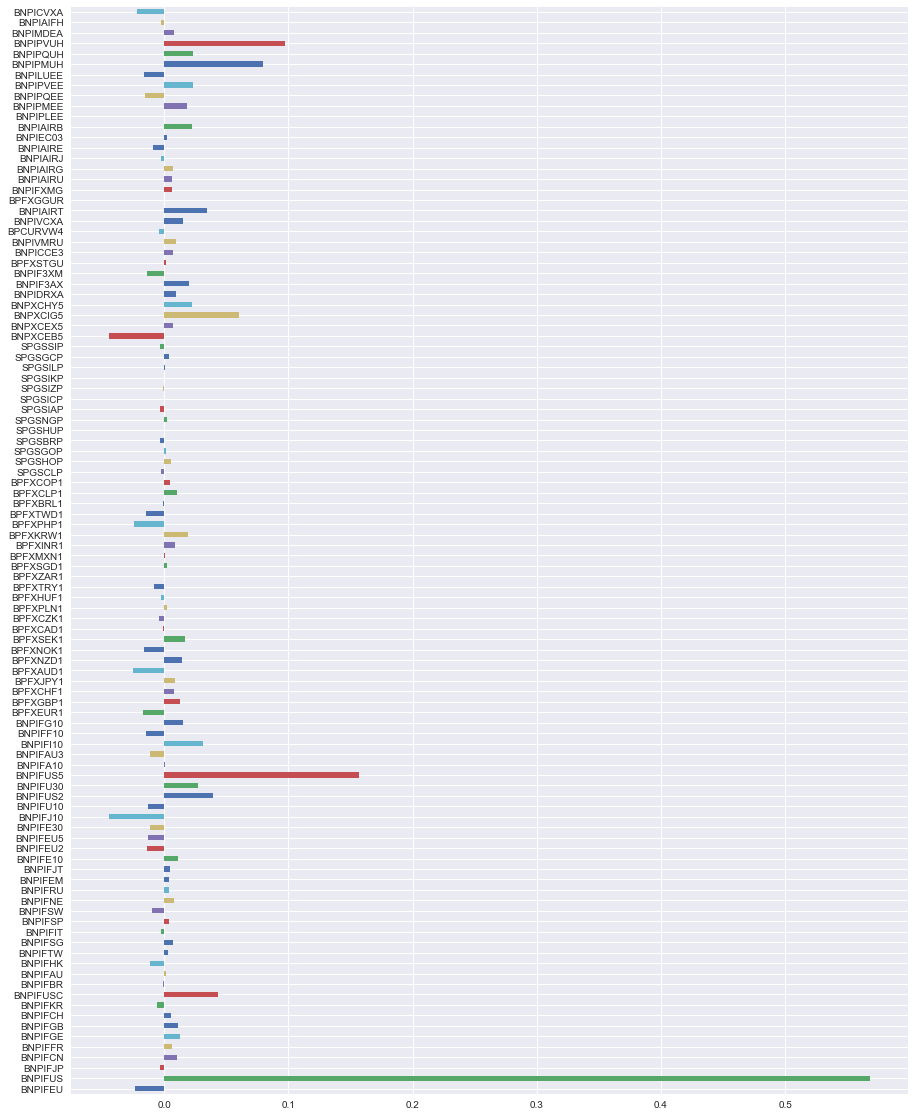

In [48]:
df_weight_kalman.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

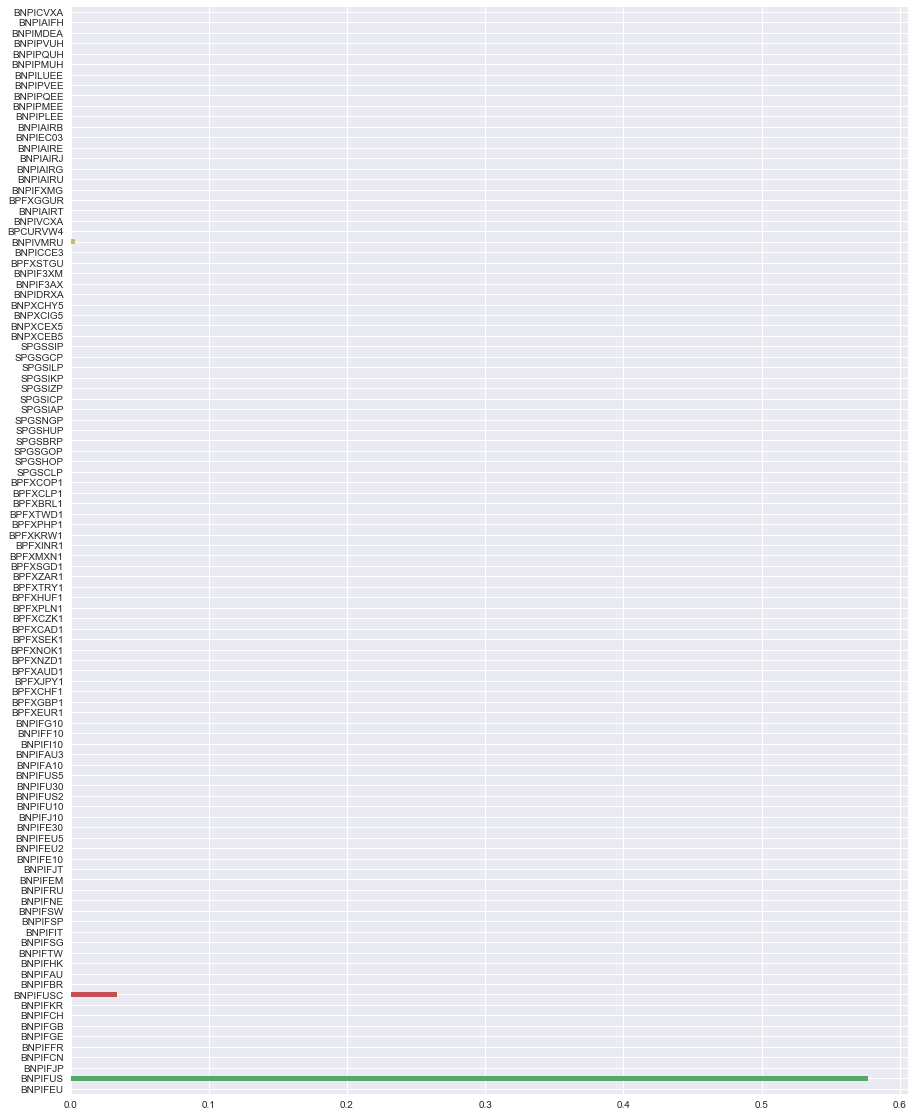

In [49]:
df_weight_kalman_bic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

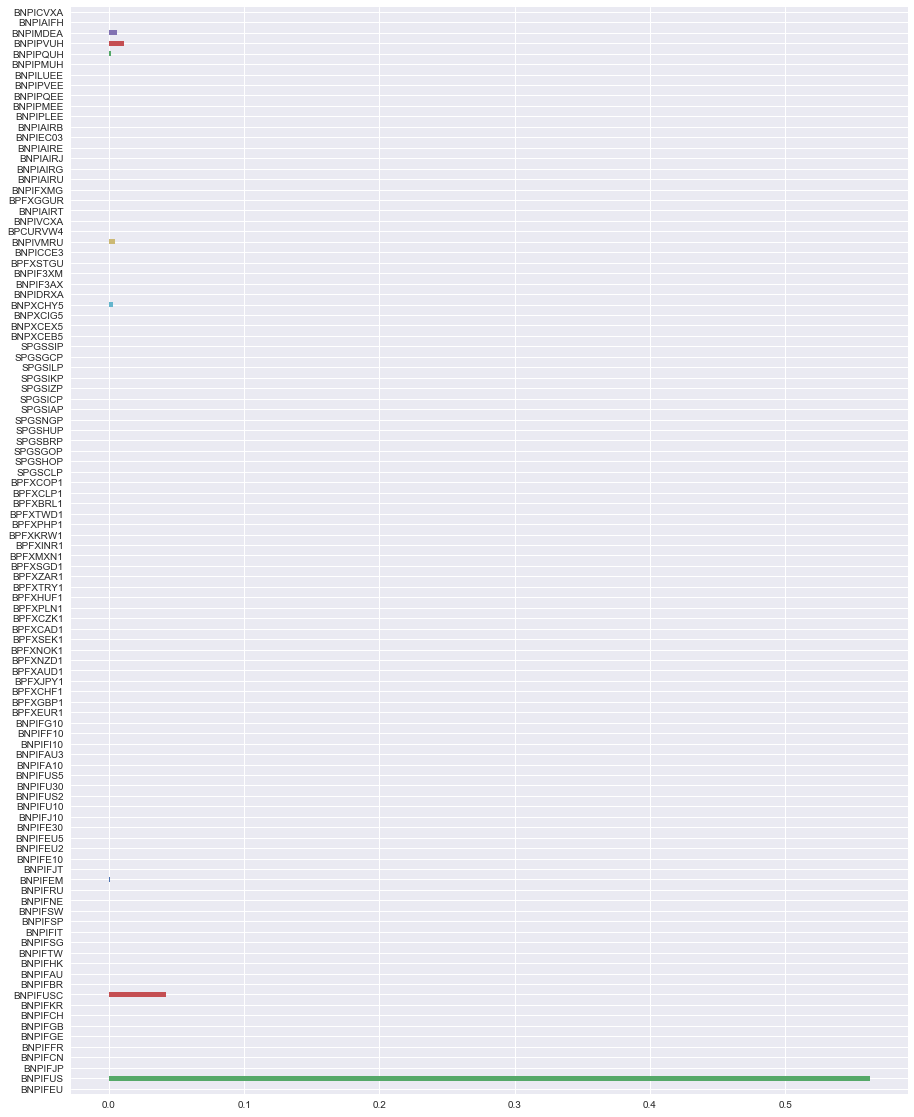

In [50]:
df_weight_kalman_aic.loc[df_res.index[0]:].mean(axis=0).plot(kind='barh', figsize=(15,20))

In [51]:
limit = 60
df_autocorr = pd.DataFrame(data=[df_res.drop(["Lasso AIC","Lasso BIC"],axis=1)\
                                 .pct_change().apply(lambda col : col.autocorr(lag=i)) for i in range(1,limit)])
df_autocorr[r"$2/\sqrt{n}$"] = [2/np.sqrt(len(df_res)-i) for i in range(1,limit)]
df_autocorr[r"$-2/\sqrt{n}$"] = [-2/np.sqrt(len(df_res)-i) for i in range(1,limit)]

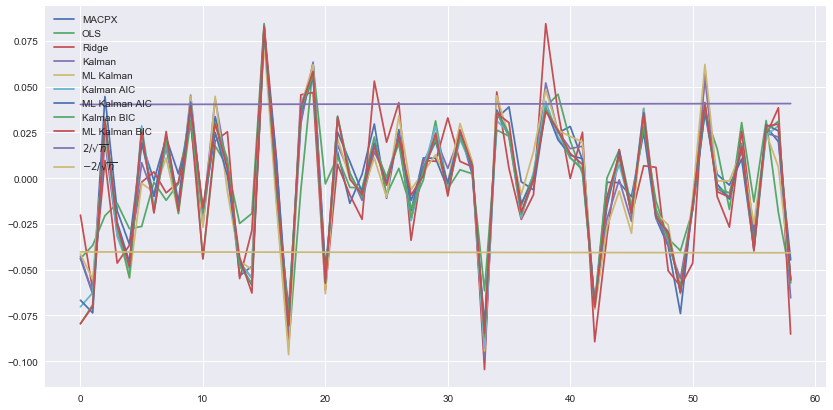

In [52]:
df_autocorr.plot(figsize=(14,7))

In [53]:
df_res[fund_name].pct_change().autocorr(lag=1)

-0.04392859867916788

In [54]:
df_res['Kalman'].pct_change().autocorr(lag=1)

-0.04278076636235482

In [55]:
df_res['Kalman BIC'].pct_change().autocorr(lag=1)

-0.07959249239662583

In [56]:
df_res['Kalman AIC'].pct_change().autocorr(lag=1)

-0.07029627391557798

In [57]:
df_res['Lasso AIC'].pct_change().autocorr(lag=1)

-0.06855691113815982